In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import scipy.stats as stats 
import warnings
import pylab 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_harvey_collier

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pdInputData = pd.read_excel("ProjectInputData.xlsx")
pdInputData.rename(columns={"Close_ETF" : "DailyETFReturns", "oil": "DailyRelativeChangeOilPrice", \
                            "gold": "DailyRelativeChangeGoldPrice", "JPM": "DailyJPMStockReturns"}, inplace = True)
pdInputDataP8 = pdInputData[['DailyETFReturns', 'DailyRelativeChangeGoldPrice']].copy()
pdInputDataP8.head()

,DailyETFReturns,DailyRelativeChangeGoldPrice
0,97.349998,0.004668
1,97.750000,-0.001366
2,99.160004,-0.007937
3,99.650002,0.014621
4,99.260002,-0.011419


Starting points of the graph are on x axis:-0.065804741 on y axis: 96.419998


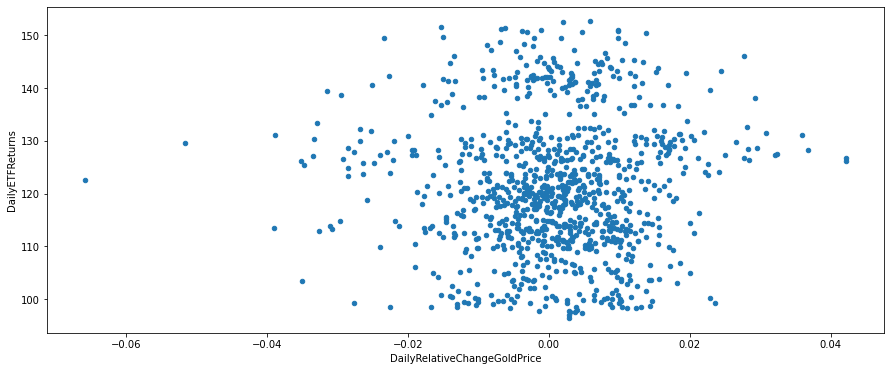

In [3]:
#1) Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between them which can be observed from the scatter plot?
pdInputDataP8.plot.scatter(x="DailyRelativeChangeGoldPrice", y ="DailyETFReturns", figsize=(15,6))
print("Starting points of the graph are on x axis:{} on y axis: {}".format(pdInputDataP8.DailyRelativeChangeGoldPrice.min(), pdInputDataP8.DailyETFReturns.min()))

In [4]:
#2) Calculate the coefficient of correlation between ETF and Gold and interpret it.
def get_Correlation_coefficient(x, y):
    n = len(x)
    return (  ( n * np.sum(x*y) )  -  ( np.sum(x) * np.sum(y) )  ) \
           / np.sqrt( ( ( n * np.sum( x**2) ) - (np.sum(x))**2 ) * ( ( n * np.sum(y**2) ) - (np.sum(y))**2 ) )

# Get x and y input values
x = pdInputDataP8.DailyRelativeChangeGoldPrice
y = pdInputDataP8.DailyETFReturns

r = get_Correlation_coefficient(x, y)
print("The Pearson’s Correlation coefficient r between ETF and Gold is: ", r)

The Pearson’s Correlation coefficient r between ETF and Gold is:  0.02299557007605459


The slope of line=25.60438932442728 and the intercept=121.1359884988982


Text(0.5, 1.0, 'Scatter plot: ETF Vs Gold')

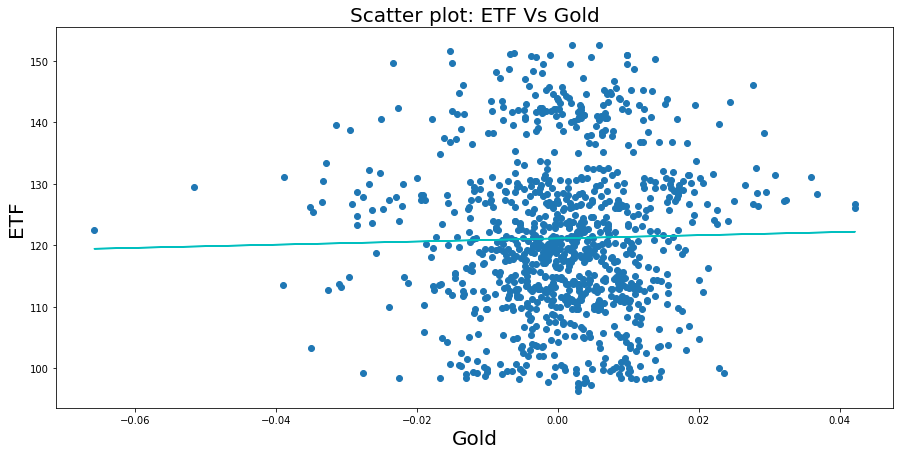

In [5]:
#3) Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line? How to interpret them?
def get_mean(serVariableValues):
    return serVariableValues.mean()

def get_slope(x, y):
    
    # Calculate x bar and y bar
    x_bar = get_mean(x)  # x bar
    y_bar = get_mean(y)  # y bar
    
    return  np.sum( (x-x_bar) * (y - y_bar) ) / np.sum( (x-x_bar)**2 )

def calculate_intercept_of_the_line(y, x, floarSlope):
    return np.mean(y - floarSlope * x) #b0 = y - b1x

def get_regression_line(x, floatIntercept, floarSlope):
    return floatIntercept + floarSlope * x

def calculate_regression_line(x, y):
    
    # Calculate b0 and b1 that is intercept and slope of the line
    floarSlope = get_slope(x, y)
    floatIntercept = calculate_intercept_of_the_line(y, x, floarSlope)
    y_hat = get_regression_line(x, floatIntercept, floarSlope)
    
    
    return floarSlope, floatIntercept, y_hat
# Get x and y input values
x = pdInputDataP8.DailyRelativeChangeGoldPrice
y = pdInputDataP8.DailyETFReturns
floarSlope, floatIntercept, y_hat = calculate_regression_line(x, y)
print("The slope of line={} and the intercept={}".format(floarSlope, floatIntercept))

#pdInputDataP8.plot.scatter(x="DailyRelativeChangeGoldPrice", y ="DailyETFReturns", figsize=(15,6))
plt.figure(figsize=(15,7))
plt.scatter(x, y)             
plt.xlabel("Gold", fontsize = 20)
plt.ylabel("ETF", fontsize = 20)
plt.plot(x, y_hat, 'c')  
plt.title("Scatter plot: ETF Vs Gold", fontsize = 20)

In [6]:
#4) Conduct a two-tailed t-test with 𝐻0: 𝛽1=0.
b1=floarSlope
Beta1 = 0      # Null Hypothesis: When B1 = 0
n = len(x)
alpha = 0.01  # Is the linear relationship between ETF (Y) and Gold (X) significant at the significance level 0.01
def get_mean_square_error( y, y_hat ):
    return np.square(np.subtract(y,y_hat)).mean() 

#### Method 2:
#from sklearn.metrics import mean_squared_error
#def get_mean_square_error( y,y_hat ):
#    return mean_squared_error(y,y_hat)
def get_square_error(MSE, x):
    x_bar = get_mean(x)
    return np.sqrt(MSE) / np.sqrt(np.sum(np.square(x-x_bar)))

def get_t_score(x, y, y_hat, b1, Beta1):
    # Calculation of Mean Squared Error (MSE)
    MSE = get_mean_square_error( y, y_hat )
    # Calculation of Squared Error 
    SEb1 = get_square_error(MSE, x)
    return (b1 - Beta1) / SEb1  

def get_p_value_from_t_score(t_score):
    return stats.t.sf(np.abs(t_score), n-1)*2  # two-sided pvalue = Prob(abs(t_score) > t_score)

t_score =  get_t_score(x, y, y_hat, b1, Beta1) # t-statistic for H0: B1 = 0 
print("Hence t_score is: ", t_score)

p_value = get_p_value_from_t_score(t_score)
print("Got p value using t-score as: ", p_value)

def check_assumption(alpha, p_value):

    if (p_value > alpha) :
        print('Same distributions (failed to reject H0)')
    else:
        print('Different distributions (reject H0)')

check_assumption(alpha, p_value)

Hence t_score is:  0.7273761176534508
Got p value using t-score as:  0.4671660043871
Same distributions (failed to reject H0)


In [7]:
#5) Suppose that you use the coefficient of determination to assess the quality of this fitting. Is it a good model? Why or why not?
def get_residuals(y,y_hat):
    return y-y_hat

def squared_error(y,y_hat):
    return sum( np.square( get_residuals(y, y_hat) ) )

def total_sum_of_squares(y, y_bar):
    return np.sum( np.square( y - y_bar ) )

def coefficient_of_determination(y,y_hat):
    #coefficient of determination(R^2) =  1 - (RSS/ TSS)
    
    #RSS = sum of squares of residual errors 
    floatRSS = squared_error(y, y_hat)

    y_bar = get_mean(y)
    #TSS = total sum of squares (proportional to the variance of the data) 
    floatTSS = total_sum_of_squares(y, y_bar)

    return 1 - (floatRSS /  floatTSS)

# Get x and y input values
x = pdInputDataP8.DailyRelativeChangeGoldPrice
y = pdInputDataP8.DailyETFReturns

floarSlope, floatIntercept, y_hat = calculate_regression_line(x, y)

R2 = coefficient_of_determination(y,y_hat)
print("The coefficient of determination (R^2) score for a model to assess the quality of this fitting is: ", R2)

The coefficient of determination (R^2) score for a model to assess the quality of this fitting is:  0.0005287962431222981


<Figure size 1080x504 with 0 Axes>

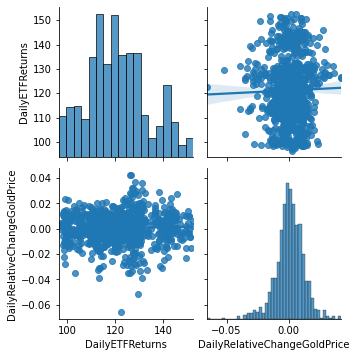

In [8]:
#6) What are the assumptions you made for this model fitting?
#Plot pairwise relationships in a dataset with one independent vairable xi and one dependent variable yi
plt.figure(figsize=(15,7))
sns.pairplot(pdInputDataP8[["DailyETFReturns", "DailyRelativeChangeGoldPrice"]], kind ='reg') 

# Save the file
plt.savefig('Part8Q6_1.png', bbox_inches='tight')
plt.show() 

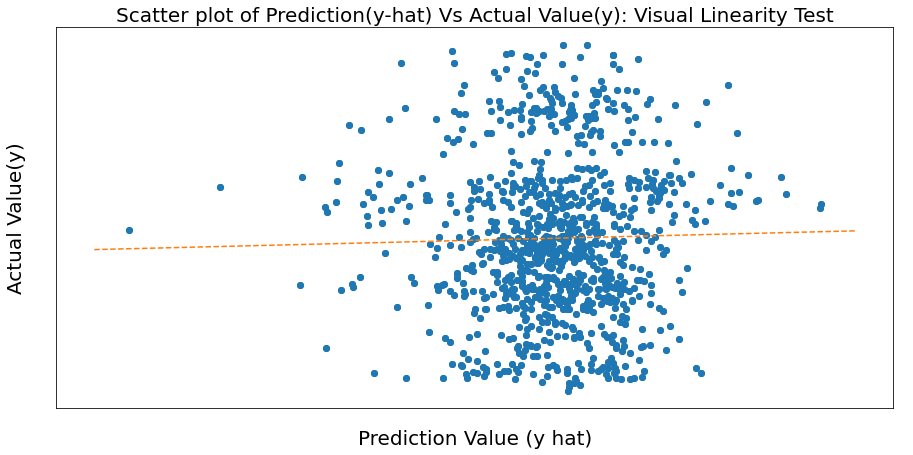

Different distributions (reject H0)
Different distributions (reject H0)


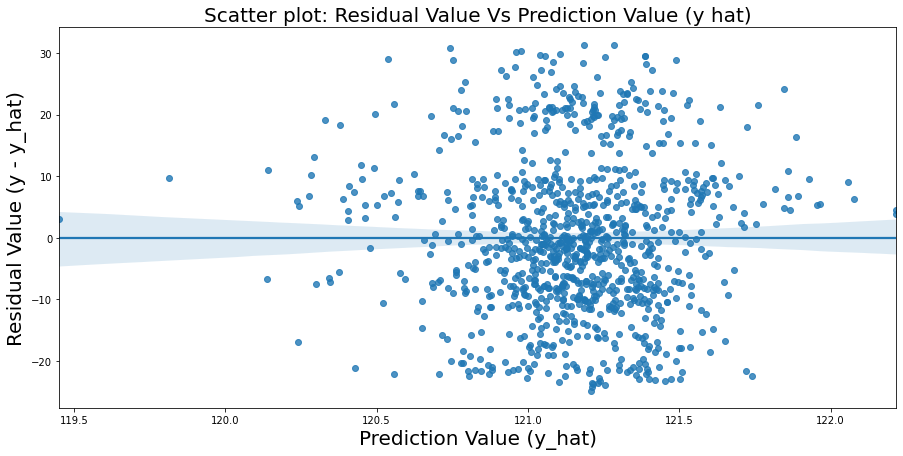

In [9]:
def abline(slope, intercept):
    # """Plot a line from slope and intercept, borrowed from https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    

#plot predicted vs actual
plt.figure(figsize=(15,7))
plt.scatter(y_hat, y)
plt.xlabel("Prediction Value (y hat)" , fontsize = 20)
plt.ylabel("Actual Value(y)", fontsize = 20)
plt.title("Scatter plot of Prediction(y-hat) Vs Actual Value(y): Visual Linearity Test", fontsize = 20)


plt.plot(y_hat, y,'o')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(1,0)
plt.show()

#fit an OLS model to data
model = sm.OLS(y, sm.tools.add_constant(x))
results = model.fit()
#predict y values for training data
y_hat = model.predict(results.params)


ttest, pval = sm.stats.diagnostic.linear_rainbow(res=results) 
def check_assumption(alpha, p_value):

    if (p_value > alpha) :
        print('Same distributions (failed to reject H0)')
    else:
        print('Different distributions (reject H0)')

alpha = 0.05
check_assumption(alpha, pval)

ttest, pval = linear_harvey_collier(results)
check_assumption(alpha, pval)

### # Plot Predict Vs Residual To Check Linearity  
serResidual=get_residuals(y,y_hat)
plt.figure(figsize=(15,7))
sns.regplot(x=y_hat,y=serResidual)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual Value (y - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Value Vs Prediction Value (y hat)", fontsize = 20)
plt.show()

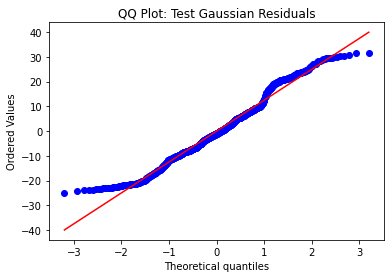

In [10]:
stats.probplot(y-y_hat, dist="norm", plot=pylab) 
pylab.title('QQ Plot: Test Gaussian Residuals') 
pylab.show()

In [11]:
#7) Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF return, and the 99% prediction interval of the
def get_confidance_intervals(floatAlpha, n_1, pop_mean):
    return stats.t.interval(alpha=floatAlpha, df=n_1, loc=pop_mean)
# Given the daily relative change in the gold price is 0.005127. 
# Calculate the 99% confidence interval of the mean daily ETF return, and the 99% prediction interval of the

n_1 = len(pdInputDataP8)-1
daily_relative_cahnge = 0.005127
floatAlpha = 0.99

confidence_interval = get_confidance_intervals(floatAlpha, n_1, daily_relative_cahnge)
print("Confidance interval for gold is (with daily relative change in the gold price is 0.005127) ", confidence_interval, "For alpha: ", floatAlpha)


# Method 1: Without scaled

import scipy.stats as st
#create 99% confidence interval for same sample

n_1 = len(pdInputDataP8)-1
pop_mean = np.mean(pdInputDataP8.DailyETFReturns)
floatAlpha = 0.99
confidence_interval  = get_confidance_intervals(floatAlpha, n_1, pop_mean)
print("Confidance interval for Close_ETF is ", confidence_interval, "For alpha: ", floatAlpha)

#create 99% confidence interval for same sample

n_1 = len(pdInputDataP8)-1
pop_mean = np.mean(pdInputDataP8)
floatAlpha = 0.99

confidence_interval = get_confidance_intervals(floatAlpha, n_1, pop_mean)
print("Confidance interval for Close_ETF & gold is ", confidence_interval, "For alpha: ", floatAlpha)

Confidance interval for gold is (with daily relative change in the gold price is 0.005127)  (-2.575632637267628, 2.585886637267628) For alpha:  0.99
Confidance interval for Close_ETF is  (118.57220037473236, 123.73371964926763) For alpha:  0.99
Confidance interval for Close_ETF & gold is  (array([118.57220037,  -2.5800968 ]), array([123.73371965,   2.58142247])) For alpha:  0.99
